DataFrameの列: Index(['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


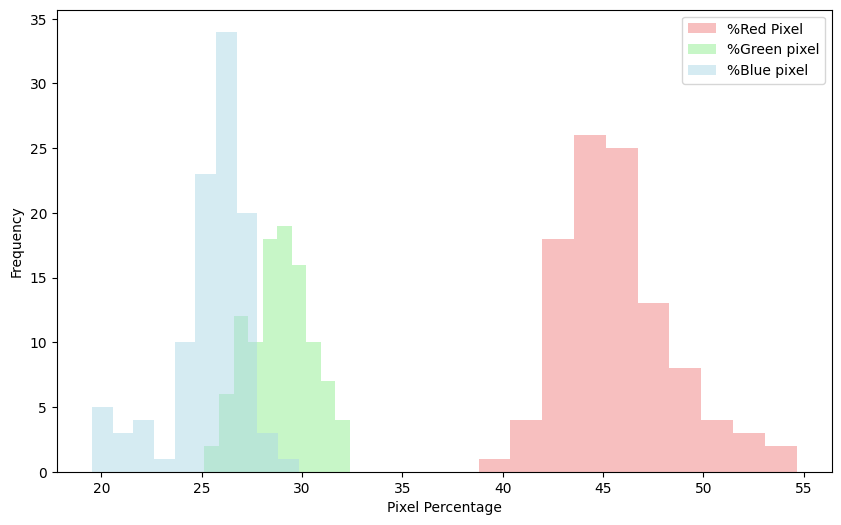

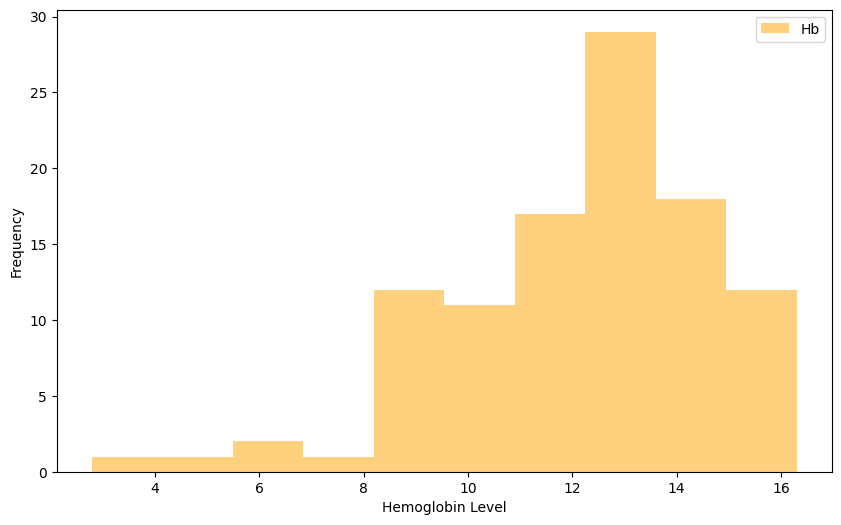

/var/folders/3g/7mz90_v15mnfmnvkr1bb3qgh0000gp/T/ipykernel_39389/2803181805.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[column], palette=palette)


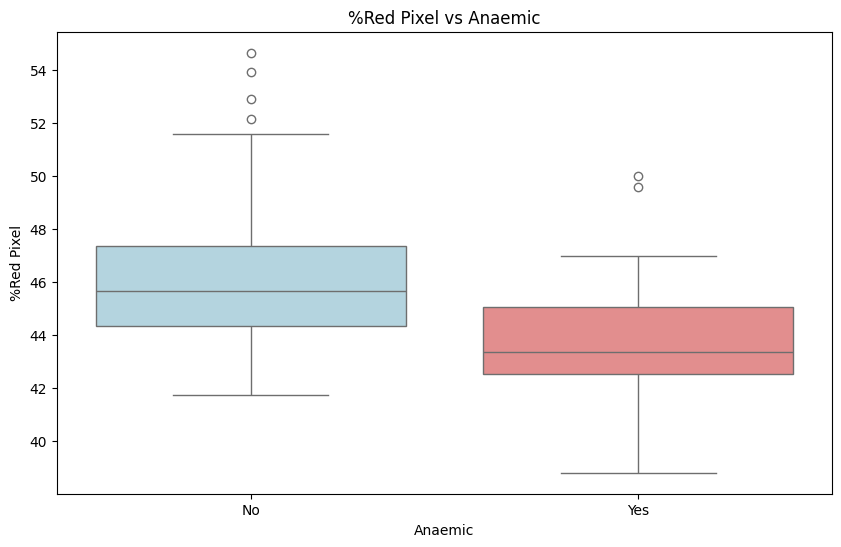

/var/folders/3g/7mz90_v15mnfmnvkr1bb3qgh0000gp/T/ipykernel_39389/2803181805.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[column], palette=palette)


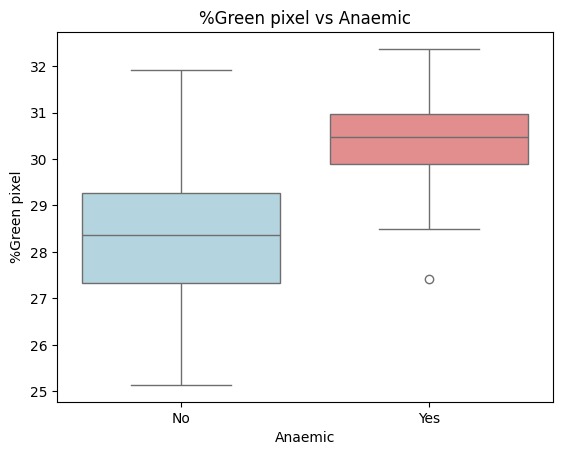

/var/folders/3g/7mz90_v15mnfmnvkr1bb3qgh0000gp/T/ipykernel_39389/2803181805.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[column], palette=palette)


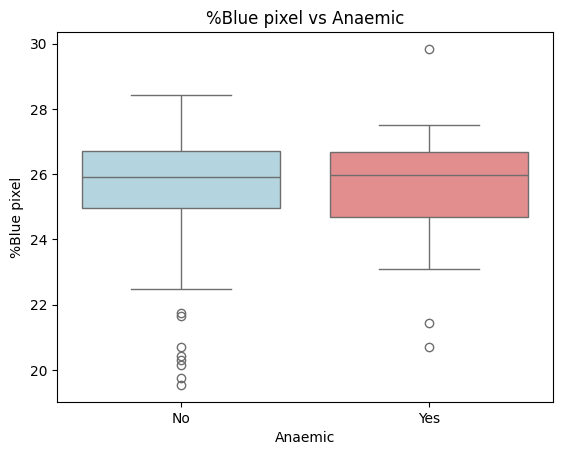

/var/folders/3g/7mz90_v15mnfmnvkr1bb3qgh0000gp/T/ipykernel_39389/2803181805.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X['Hb'], palette=palette)


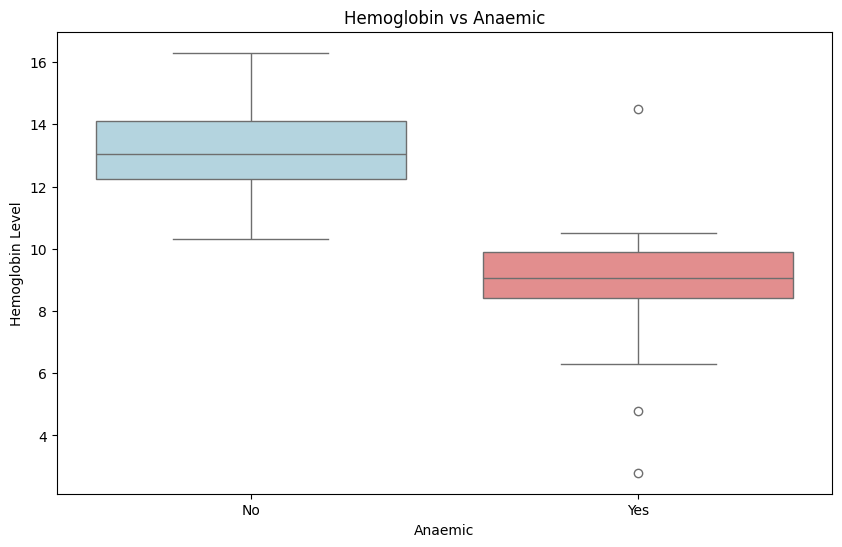

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[16  0]
 [ 0  5]]


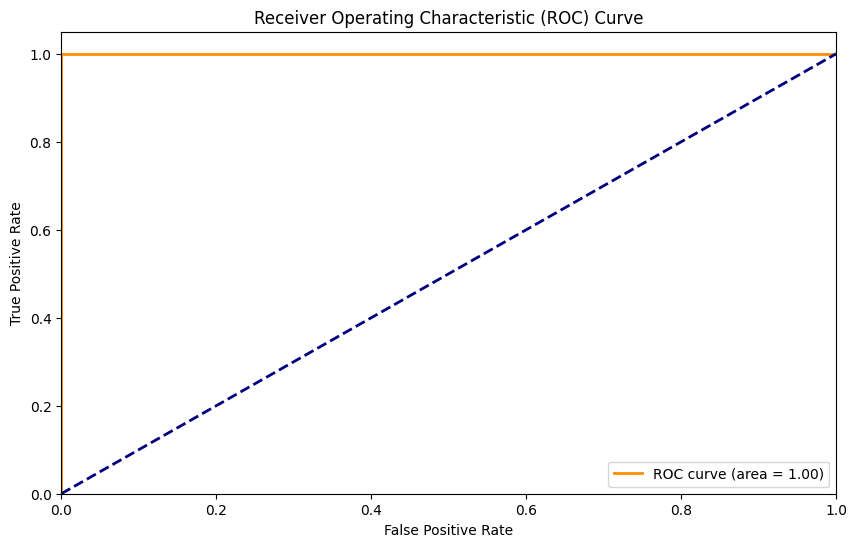

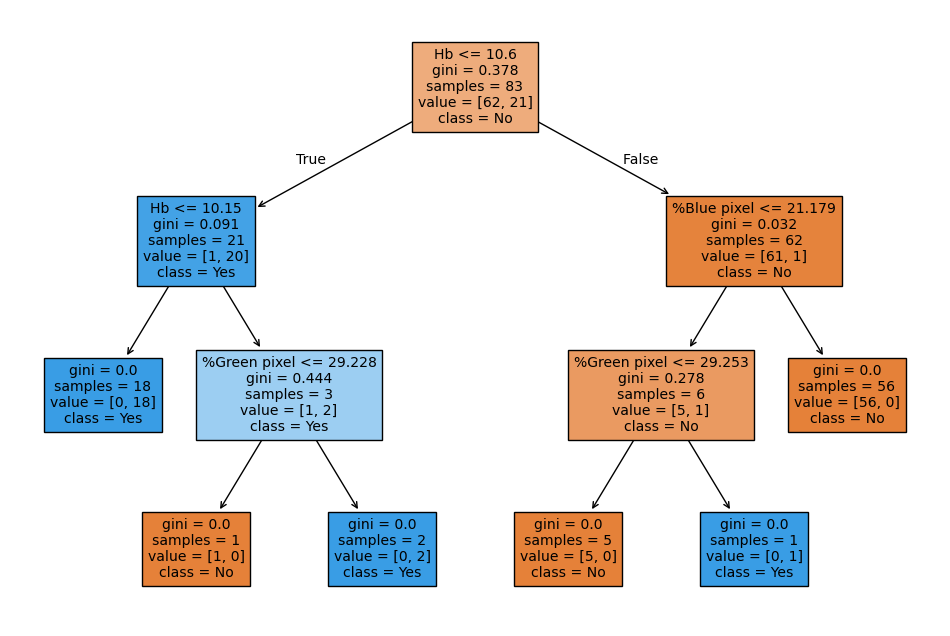

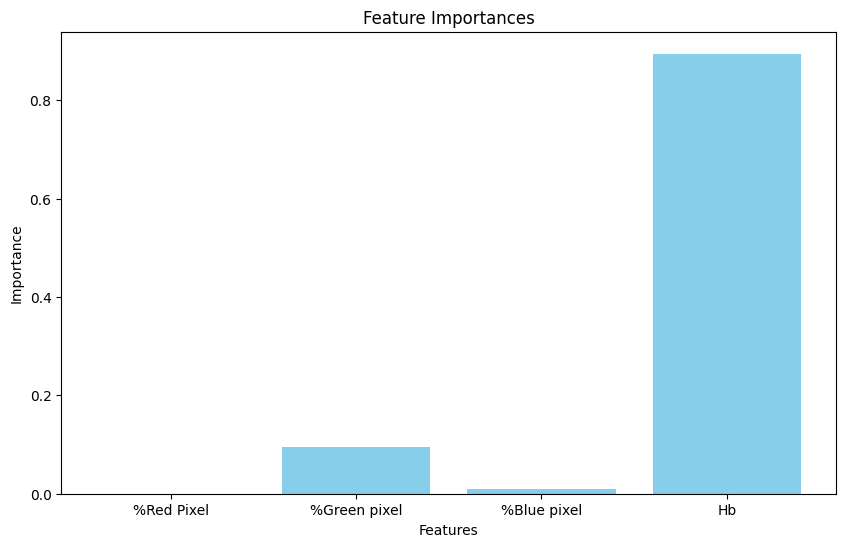

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn import tree

# データの読み込み
df = pd.read_csv('/Users/madoka/trantura_ondisk/practice/decision_tree/anemia_dataset.csv')

# DataFrameの列を確認
print("DataFrameの列:", df.columns)

# 存在する列名のみを使用して不要な列を削除
columns_to_drop = ['Number', 'Name', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns_to_drop, axis=1)

# 特徴量と目的変数を分ける
X = df.drop('Anaemic', axis=1)
y = df['Anaemic']

# 目的変数がカテゴリ型であることを確認
y = y.astype('category')

# 全ての特徴量のヒストグラムを表示
plt.figure(figsize=(10, 6))
colors = {'%Red Pixel': 'lightcoral', '%Green pixel': 'lightgreen', '%Blue pixel': 'lightblue'}
for column in X.columns:
    if column != 'Hb':
        plt.hist(X[column], bins=10, alpha=0.5, label=column, color=colors.get(column, 'gray'))
plt.xlabel('Pixel Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Hbのヒストグラムを別のグラフとして表示
if 'Hb' in X.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(X['Hb'], bins=10, alpha=0.5, label='Hb', color='orange')
    plt.xlabel('Hemoglobin Level')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
else:
    print("Hb列がデータフレームに存在しません。")

# ピクセルと貧血の関係を表すグラフ
palette = {'No': 'lightblue', 'Yes': 'lightcoral'}
plt.figure(figsize=(10, 6))
for column in ['%Red Pixel', '%Green pixel', '%Blue pixel']:
    if column in X.columns:
        sns.boxplot(x=y, y=X[column], palette=palette)
        plt.title(f'{column} vs Anaemic')
        plt.xlabel('Anaemic')
        plt.ylabel(column)
        plt.show()

# ヘモグロビンと貧血の相関関係を表すグラフ
if 'Hb' in X.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y, y=X['Hb'], palette=palette)
    plt.title('Hemoglobin vs Anaemic')
    plt.xlabel('Anaemic')
    plt.ylabel('Hemoglobin Level')
    plt.show()
else:
    print("Hb列がデータフレームに存在しません。")

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルの作成
model = DecisionTreeClassifier()

# モデルの訓練
model.fit(X_train, y_train)

# テストデータの予測
y_pred = model.predict(X_test)

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# ROC曲線とAUCの計算
y_test_numeric = y_test.cat.codes  # y_testを数値型に変換
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 決定木の可視化
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, ax=ax)

# ノードの色をカスタマイズ
colors = {'%Red Pixel': 'lightcoral', '%Green pixel': 'lightgreen', '%Blue pixel': 'lightblue', 'Hb': 'orange'}

# ノードの背景色を変更するために、パッチを使用
for node in ax.get_children():
    if isinstance(node, plt.Text):
        text = node.get_text()
        node.set_color('black')  # 文字の色を黒に設定
    if isinstance(node, plt.Rectangle):
        for feature, color in colors.items():
            if feature in node.get_label():
                node.set_facecolor(color)
                break
        else:
            node.set_facecolor('lightgray')

plt.show()

# 特徴量の重要度を計算
feature_importances = model.feature_importances_

# 特徴量の重要度を棒グラフとして表示
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()